In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
# 1. Load data
df = pd.read_csv(r'C:\Users\USER1\Downloads\Stroke Prediction Dataset\healthcare-dataset-stroke-data.csv')

In [6]:
# 2. Drop kolom yang tidak perlu
df.drop('id', axis=1, inplace=True)

In [8]:
# 3. Tangani missing value (bmi)
df.fillna({'bmi': df['bmi'].mean()}, inplace=True)

In [9]:
# 4. Encode semua kolom kategorikal
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
# 5. Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [11]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 7. Buat dan latih model Logistic Regression dengan class_weight
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
# 8. Evaluasi
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[719 241]
 [ 15  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



visualisasi

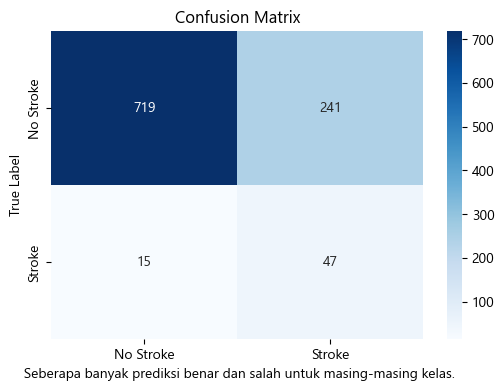

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel(" Seberapa banyak prediksi benar dan salah untuk masing-masing kelas.")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### 📊 Confusion Matrix

“Gambar ini adalah *Confusion Matrix*, yang menunjukkan seberapa akurat model kita dalam memprediksi risiko stroke.”

Artinya:
-  **719 orang** diprediksi **tidak stroke** dan memang benar tidak stroke (✅)  
-  **47 orang** diprediksi **stroke** dan memang benar stroke (✅)  
-  **241 orang** diprediksi **stroke**, padahal **tidak stroke** (❌)  
-  **15 orang** diprediksi **tidak stroke**, padahal **kena stroke** (❌)


💡 **Insight:**  
“Model ini cukup bagus, tapi masih sering mengira orang sehat itu stroke (False Positive tinggi).  
Ini bisa disebabkan karena **data stroke yang tidak seimbang**.”


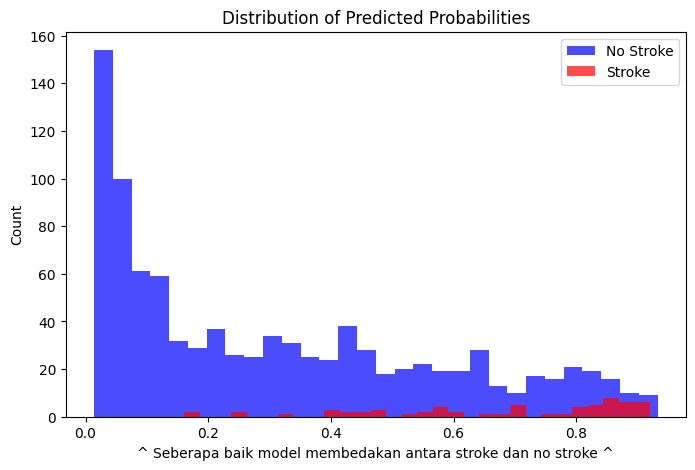

In [29]:
import matplotlib.pyplot as plt

# Buat histogram prediksi stroke dan non-stroke
plt.figure(figsize=(8, 5))
plt.hist(y_prob[y_test==0], bins=30, alpha=0.7, label='No Stroke', color='blue')
plt.hist(y_prob[y_test==1], bins=30, alpha=0.7, label='Stroke', color='red')
plt.xlabel('^ Seberapa baik model membedakan antara stroke dan no stroke ^')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()


## 📊 Histogram Distribusi Probabilitas

Grafik ini menunjukkan distribusi probabilitas berdasarkan model prediksi:

- 🎤 **Warna biru** mewakili orang yang **tidak stroke**
- 🎤 **Warna merah** mewakili orang yang **stroke**
- Sumbu X menunjukkan nilai prediksi model dari 0 sampai 1 (probabilitas).

**Contoh:**  
📌 **Misalnya**, kalau seseorang punya nilai 0.9, artinya model yakin 90% orang itu bakal kena stroke.

### Insight:
- 🎤 Banyak pasien **tidak stroke** (biru) memiliki probabilitas rendah (dekat 0).
- 🎤 Beberapa pasien **stroke** (merah) punya probabilitas tinggi (dekat 1).
- 🎤 Ini menunjukkan bahwa model bisa membedakan antara **stroke** dan **tidak**, meskipun belum sempurna.
